<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(0_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.401798  57.958842  64.905841  ...  178.366738  177.931216  0.435521
      1.0    43.006052  28.370048  68.202480  ...  150.088048  149.128447  0.959602
      2.0    52.071147  38.206212  52.394608  ...  154.029669  151.926629  2.103040
      3.0    96.558507  79.981600  25.994930  ...  205.799533  211.769717 -5.970184
      4.0    41.552209  79.135375  68.426678  ...  200.855252  198.970163  1.885090
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   50.052080  27.453883  87.473108  ...  175.184157  174.641414  0.542743
      56.0   80.886971  93.261024  70.827683  ...  253.256422  254.708976 -1.452554
      57.0   64.258822  63.024567  83.431063  ...  221.811135  220.253510  1.557625
      58.0   32.126723  26.456932  87.563022  ...  156.355203  155.785199  0.570004
      59.0   61.974268  49.007905  77.466858  ...  197.496770  198.282473 -0.785704

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.401798  57.958842  64.905841  ...  178.366738  177.931216  0.435521
      1.0    43.006052  28.370048  68.202480  ...  150.088048  149.128447  0.959602
      2.0    52.071147  38.206212  52.394608  ...  154.029669  151.926629  2.103040
      3.0    96.558507  79.981600  25.994930  ...  205.799533  211.769717 -5.970184
      4.0    41.552209  79.135375  68.426678  ...  200.855252  198.970163  1.885090
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   50.052080  27.453883  87.473108  ...  175.184157  174.641414  0.542743
      56.0   80.886971  93.261024  70.827683  ...  253.256422  254.708976 -1.452554
      57.0   64.258822  63.024567  83.431063  ...  221.811135  220.253510  1.557625
      58.0   32.126723  26.456932  87.563022  ...  156.355203  155.785199  0.570004
      59.0   61.974268  49.007905  77.466858  ...  197.496770  198.282473 -0.785704

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.401798,57.958842,64.905841,0.100256,178.366738,177.931216,0.435521
1,0.0,1.0,43.006052,28.370048,68.202480,0.509469,150.088048,149.128447,0.959602
2,0.0,2.0,52.071147,38.206212,52.394608,1.357702,154.029669,151.926629,2.103040
3,0.0,3.0,96.558507,79.981600,25.994930,-6.735503,205.799533,211.769717,-5.970184
4,0.0,4.0,41.552209,79.135375,68.426678,1.740991,200.855252,198.970163,1.885090
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,50.052080,27.453883,87.473108,0.205086,175.184157,174.641414,0.542743
59996,999.0,56.0,80.886971,93.261024,70.827683,-1.719256,253.256422,254.708976,-1.452554
59997,999.0,57.0,64.258822,63.024567,83.431063,1.096682,221.811135,220.253510,1.557625
59998,999.0,58.0,32.126723,26.456932,87.563022,0.208525,156.355203,155.785199,0.570004


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.401798  57.958842  64.905841  ...  178.366738  177.931216  0.435521
      1.0    43.006052  28.370048  68.202480  ...  150.088048  149.128447  0.959602
      2.0    52.071147  38.206212  52.394608  ...  154.029669  151.926629  2.103040
      3.0    96.558507  79.981600  25.994930  ...  205.799533  211.769717 -5.970184
      4.0    41.552209  79.135375  68.426678  ...  200.855252  198.970163  1.885090
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   50.052080  27.453883  87.473108  ...  175.184157  174.641414  0.542743
      56.0   80.886971  93.261024  70.827683  ...  253.256422  254.708976 -1.452554
      57.0   64.258822  63.024567  83.431063  ...  221.811135  220.253510  1.557625
      58.0   32.126723  26.456932  87.563022  ...  156.355203  155.785199  0.570004
      59.0   61.974268  49.007905  77.466858  ...  197.496770  198.282473 -0.785704

[60000 rows x 7 columns]

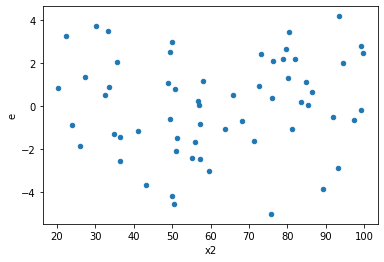

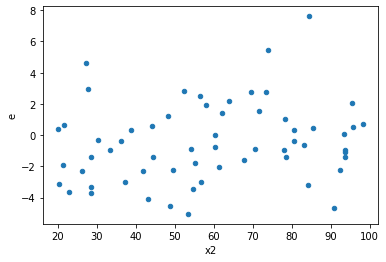

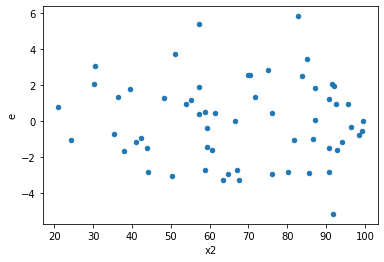

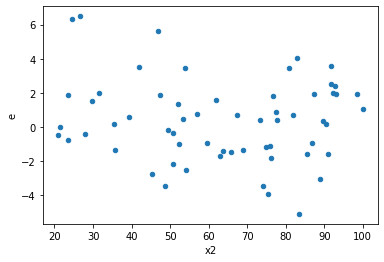

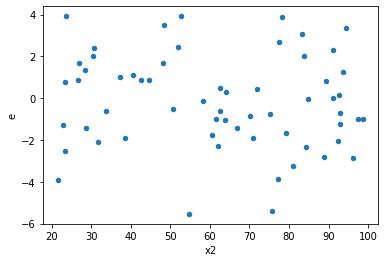

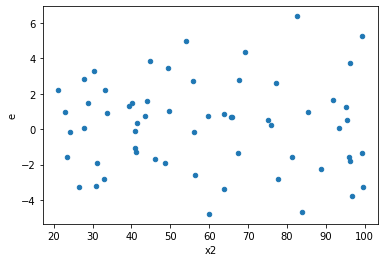

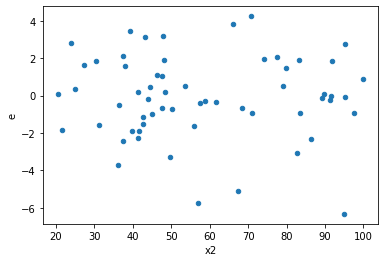

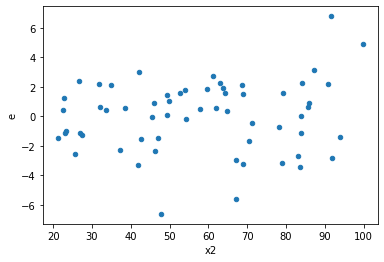

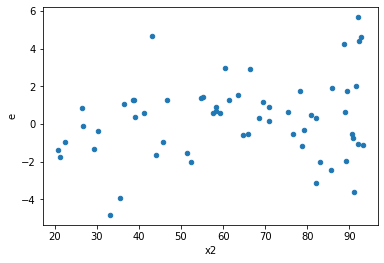

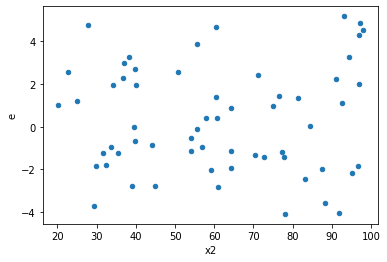

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,81.88546828983336,90.82533310660867,3.8993080138015883,4.325015862219461,1.1091752297872035,0.814553892226137,0.5927230538869315,0.4072769461130685,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,115.98947358022774,169.96721882293645,5.52330826572513,8.093677086806498,1.4653676198070968,0.38836865845711355,0.8058156707714432,0.19418432922855677,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,109.46785140268122,155.6643355908336,5.212754828699106,7.412587409087314,1.4220096000442817,0.42653571072722896,0.7867321446363855,0.21326785536361448,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,53.70550612089534,111.66398789251966,2.5574050533759687,5.317332756786651,2.0791906818856747,0.1010905856688229,0.9494547071655886,0.05054529283441145,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,69.73893569302699,85.07044159825938,3.3209016996679517,4.050973409440923,1.2198414092913286,0.6530166040668091,0.6734916979665955,0.32650830203340453,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,101.7328757665403,102.41019414703572,4.844422655549538,4.876675911763606,1.006657812190916,0.9880126119055892,0.5059936940472054,0.4940063059527946,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,110.24173521322473,160.0078896816072,5.249606438724987,7.619423318171771,1.4514275321603651,0.40027791773706567,0.7998610411314672,0.20013895886853283,Reject005=1 : Homoscedasticity
9.0,21.0,21.0,78.78449764673262,124.76642199932542,3.7516427450825054,5.941258190444067,1.583641778853175,0.3000008066895652,0.8499995966552174,0.1500004033447826,Reject005=1 : Homoscedasticity
10.0,21.0,21.0,106.77192003650818,106.86738498984421,5.084377144595628,5.088923094754486,1.0008941016823842,0.9983854778090482,0.5008072610954759,0.4991927389045241,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,81.88546828983336,90.82533310660867,3.8993080138015883,4.325015862219461,1.1091752297872035,0.814553892226137,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,103.20992278042162,75.5557760310927,4.914758227639124,3.5978940967187003,0.7320592244976007,0.4809480576307904,Reject005=1 : Homoscedasticity
2.0,21.0,21.0,115.98947358022774,169.96721882293645,5.52330826572513,8.093677086806498,1.4653676198070968,0.38836865845711355,Reject005=1 : Homoscedasticity
3.0,21.0,21.0,109.46785140268122,155.6643355908336,5.212754828699106,7.412587409087314,1.4220096000442817,0.42653571072722896,Reject005=1 : Homoscedasticity
4.0,21.0,21.0,53.70550612089534,111.66398789251966,2.5574050533759687,5.317332756786651,2.0791906818856747,0.1010905856688229,Reject005=1 : Homoscedasticity
5.0,21.0,21.0,69.73893569302699,85.07044159825938,3.3209016996679517,4.050973409440923,1.2198414092913286,0.6530166040668091,Reject005=1 : Homoscedasticity
6.0,21.0,21.0,101.7328757665403,102.41019414703572,4.844422655549538,4.876675911763606,1.006657812190916,0.9880126119055892,Reject005=1 : Homoscedasticity
7.0,21.0,21.0,110.24173521322473,160.0078896816072,5.249606438724987,7.619423318171771,1.4514275321603651,0.40027791773706567,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,92.53795461399045,67.98060391308184,4.406569267332879,3.2371716149086587,0.7346240166713617,0.48586137810414837,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      890
Reject005=0 : Heteroscedasticity    110
Name: Result_test, dtype: int64